# Logistic regression (classification)

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

y=ß+ß_1x--(i) for Linear Regression
logistic Regression normally used a line to divided the data or in other woard to classify the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv('Advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

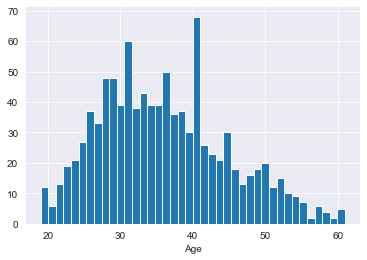

In [5]:
sns.set_style('darkgrid')
data['Age'].hist(bins=40)
plt.xlabel('Age')

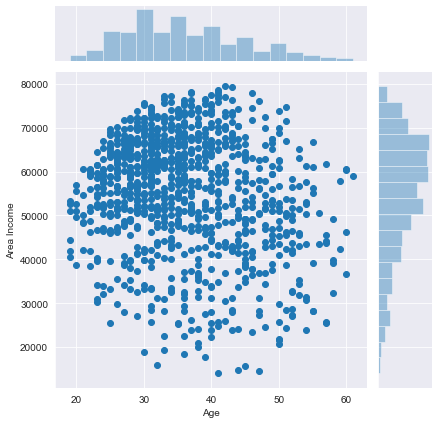

In [6]:
sns.jointplot('Age','Area Income',data=data)


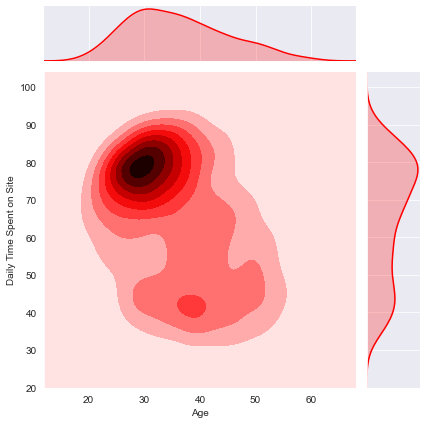

In [7]:
sns.jointplot('Age','Daily Time Spent on Site',data=data,kind='kde',color='r')


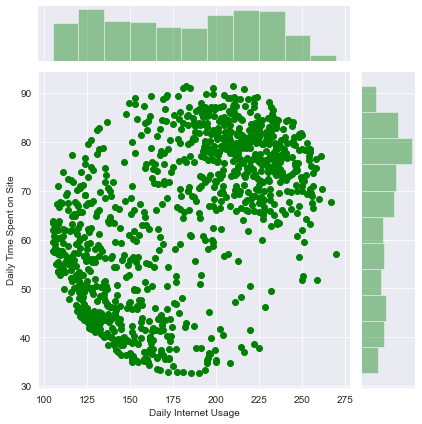

In [8]:
sns.jointplot('Daily Internet Usage','Daily Time Spent on Site',data=data,color='g')

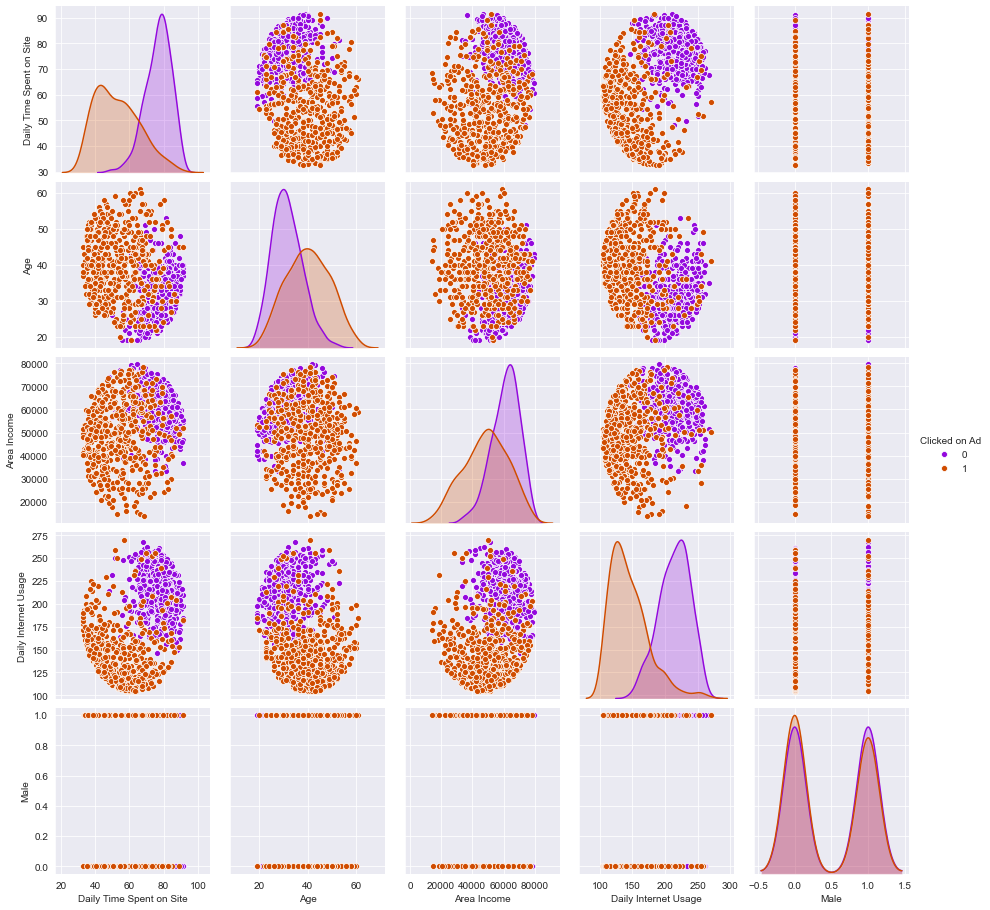

In [9]:
sns.pairplot(data,hue='Clicked on Ad',palette='gnuplot')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [30]:
Im=LogisticRegression()
Im.fit(X_train,y_train)
#logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)

LogisticRegression()

In [32]:
prediction=Im.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [38]:
accuracy=accuracy_score(y_test,prediction)
accuracy

0.906060606060606

In [50]:
#confusion matrix
conf=confusion_matrix(y_test,prediction)
conf

array([[156,   6],
       [ 25, 143]])

In [51]:
true_posi=conf[0][0]
false_posi=conf[0][1]
true_na=conf[1][0]
false_na=conf[1][1]

In [53]:
precision=true_posi/(true_posi+false_posi)
precision

0.9629629629629629

In [54]:
auc=roc_auc_score(y_test,prediction)
auc

0.9070767195767196

# fpr=false-positive
# tpr=true positive

In [55]:
fpr,tpr,threshold=roc_curve(y_test,prediction)

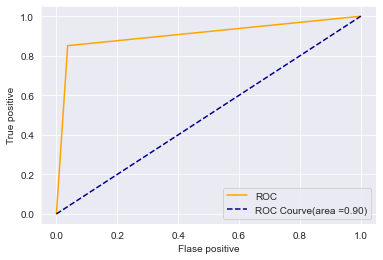

In [68]:
plt.plot(fpr,tpr,label='ROC',color='orange')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Courve(area =0.90)')
plt.xlabel('Flase positive')
plt.ylabel('True positive')
plt.legend()